<a href="https://colab.research.google.com/github/shivu432002/Sentiment_Analysis_of_Restaurant_Reviews-/blob/main/Sentimental_Analysis_of_Restaurant_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis of Restarent Reviews**

 Author : Shivananda M N

Import Dependentias and connect with drive

In [ ]:
import numpy as np       #linear algebra
import pandas as pd      #data processing ,csv file I/o

import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


from google.colab import drive
drive.mount('/content/drive/')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Restaurant_Reviews.xlsx')

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(994, 2)

In [ ]:
df.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df['Liked'].value_counts()

1    498
0    496
Name: Liked, dtype: int64

In [ ]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [ ]:
df.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

**Creating the Bag of Words model**

In [ ]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

# Cheking alpha Naive Bayes Classifier

In [ ]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Accuracy score for alpha=0.0 is: 76.0%
Accuracy score for alpha=0.1 is: 77.5%
Accuracy score for alpha=0.2 is: 78.0%
Accuracy score for alpha=0.3 is: 77.5%
Accuracy score for alpha=0.4 is: 77.5%
Accuracy score for alpha=0.5 is: 76.5%
Accuracy score for alpha=0.6 is: 76.5%
Accuracy score for alpha=0.7 is: 76.5%
Accuracy score for alpha=0.8 is: 75.5%
Accuracy score for alpha=0.9 is: 75.5%
Accuracy score for alpha=1.0 is: 75.5%
--------------------------------------------
The best accuracy is 78.0% with alpha value as 0.2


In [ ]:
#Importing essential libraries for performing natural language processing on restaurant review dataset

import nltk              #natural language toolkit,is a python package that you can use for NLP
import re            #python has inbuilt packagr called re, which can use to work with regular expressions
nltk.download('stopwords')   #the NLTK corpus is a massive dump of all kinds of natural language data sets that are definently worth taking a look at
from nltk.corpus import stopwords    #A stop is a commonly used word (such as "the","a","an","in") that a search engine has been programmed to ignore
from nltk.stem.porter import PorterStemmer   # Porters stemmer it is a stem

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

#cleaning the reviews

corpus = []
for i in range(0,1000):

  #1000 records
  #cleaning special character from the reviews
  #the re.sub() method performs global search and global replace on the given data
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=str(df['Review'][i]))

    #convering the entire review into lowercase
    review = review.lower()

    #Tokenizing the review by words
    review_words = review.split()

    #removing the stop words
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]    #stopwords are the english wordswhich doesn't add much meaning to a sentence

      #streaming the stop words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    #joining the stemmed words
    review = ' '.join(review)

   #creating a corpus
    corpus.append(review)


In [ ]:
#creating the bags of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)  #max_features = 1500
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,1].values

**Split Data**

in this step, we are going to split data in two parts (training and testing),so that we can train our model on training dataset and test its accuracy on unseen test data

In [ ]:
from sklearn.model_selection import train_test_split   #used to test the data into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

Takeaway Points

Usually we take more and more dayta in training so its easy for the model to learn with more data.


**Model Training**

As we done with preprocessing part, it is time to train our model.

Multinomial Naive Bayes - The algorithm is a probabilistic learning method that is mostly Used in Natural Language Processing(NLP).The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article

In [ ]:
#Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import MultinomialNB
# the multinomial Naive Bayes classifier is suitable for classification with discrete features(e.g., word counts for text classification).

classifier = MultinomialNB()
classifier.fit(X_train,y_train)  #fit training data

MultinomialNB()

# Predicting the Test set results

In [ ]:

y_pred = classifier.predict(X_test)
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [ ]:
#Accuracy,Prediction and Recall

from sklearn.metrics import accuracy_score
#in python, the accuracy_score function of the sklearn. metrics package calculates the accuracy the accuracy score for a set of predicted labels against the true labels.

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("-------scores--------")
print("Accuracy score is : {}%".format(round(score1*100,2)))
print("precision_score is : {}%".format(round(score2*100,2)))
print("recall_score is : {}%".format(round(score3*100,2)))

-------scores--------
Accuracy score is : 75.5%
precision_score is : 75.0%
recall_score is : 78.64%


In [ ]:
#making the confusion matrix
#A confusion matrix is table that is used to define the performance of a classification algorithm.
#A confusion matrix visualizes and summarizes the performance of a classification

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[70, 27],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual values')

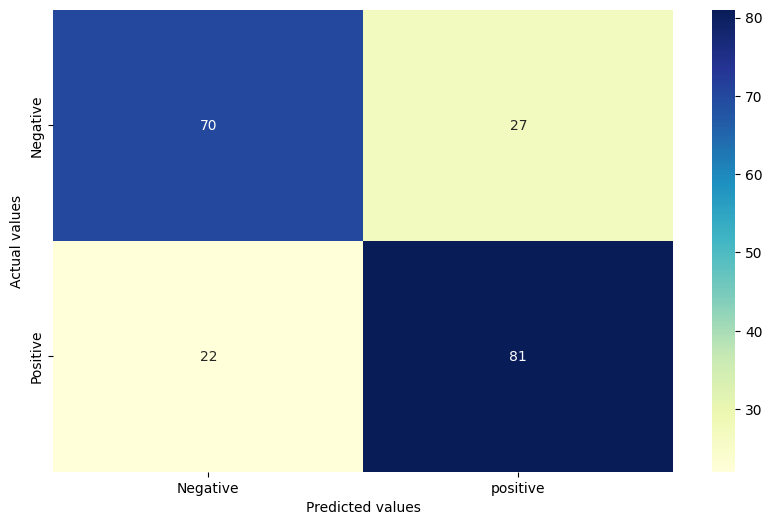

In [ ]:
#plotting the confusion matrix

import matplotlib.pyplot as plt   #matplotlib is a low level graph plotting library in python that servs as a visualization utility
import seaborn as sns    #seaborn is python data visualization library based on matplotlib
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=["Negative","positive"],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy score for alpha = {} is : {}%".format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print("-------------------------------------------")
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100,2),round(alpha_val,1)))


Accuracy score for alpha = 0.1 is : 77.5%
Accuracy score for alpha = 0.2 is : 78.0%
Accuracy score for alpha = 0.3 is : 77.5%
Accuracy score for alpha = 0.4 is : 77.5%
Accuracy score for alpha = 0.5 is : 76.5%
Accuracy score for alpha = 0.6 is : 76.5%
Accuracy score for alpha = 0.7 is : 76.5%
Accuracy score for alpha = 0.8 is : 75.5%
Accuracy score for alpha = 0.9 is : 75.5%
Accuracy score for alpha = 1.0 is : 75.5%
-------------------------------------------
The best accuracy is 78.0% with alpha value as 0.2


In [ ]:
classifier = MultinomialNB(alpha = 0.2)
classifier.fit(X_train,y_train)


MultinomialNB(alpha=0.2)

**Predictions**

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern = '[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review =sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
#Predicted values
sample_review = 'The food is very very good'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')

This is a POSITIVE review


In [ ]:
#Predicted values
sample_review = 'The food pretty good and the service was very fast'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')

This is a POSITIVE review


In [ ]:
#Predicted values
sample_review = 'The food pretty bad and the service was very slow'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')

This is Negative review!


In [ ]:
#Predicted values
sample_review = 'The food was absolutely wonderful, from preparation to presentation,very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')

This is a POSITIVE review
